# Language Analysis: Venezuela
Analyzing the language of **accounts and tweets** identified by Twitter to be associated with the country's information operations.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import langdetect
from collections import Counter
import iso639 as pylang
import seaborn as sns

twitter_color = (0.114, 0.631, 0.949, 1.0)

---
## Tweet Language Summary

In [2]:
filename_one = '../Data/venezuela_201901_1_tweets_csv_hashed.csv'
filename_two = '../Data/venezuela_201901_2_tweets_csv_hashed.csv'

#### Import dataset 1

In [3]:
venezuela_one = pd.read_csv(filename_one, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

#### Import dataset 2

In [9]:
venezuela_two = pd.read_csv(filename_two, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

#### Combine datasets

In [10]:
ven_datasets = [venezuela_one, venezuela_two]
ven = pd.concat(ven_datasets, sort=False)

#### Print number of tweets

In [11]:
print(len(ven))

9946768


#### Print features that we can access

In [12]:
ven.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

#### Sample data of tweets & their detected language

In [ ]:
for elem in ven.head(5)['tweet_text']:
    print(elem)
    print(langdetect.detect(elem))
    print()

Conozca cuál será el primer país inhabitable por culpa del cambio climático (+capitalismo) https://t.co/8FS6WCyky1 https://t.co/n0bv4I4UJ8
es

La canciller china dio una rueda de prensa en respuesta a las últimas declaraciones de la Administración Trump  https://t.co/hVXgJmy53M
es

Ministro de Brasil implicado en casos de corrupción renunció y se reunió con Borges - https://t.co/8OLhCV8aBg https://t.co/IdhFEqCMIe
es

Frustran un suicidio colectivo en varios países orquestado por un joven de 17 años https://t.co/oYX5xLid6r https://t.co/Q7QOhaONN1
es

'The Nation': Las Fuerzas Armadas de EE.UU. no pueden ser denominadas las mejores del mundo … https://t.co/OuY3cVXft3
es



#### Detect language of tweets & store in a list
Only do first 10,000 tweets for Milestone 1

In [23]:
tweet_languages = []
num_of_tweets = 10000
ven_tweets = ven.head(num_of_tweets)['tweet_text']

for tweet_text in ven_tweets:
    lang = ''
    try:
        lang = langdetect.detect(tweet_text)
    except:
        lang = 'n/a'
    tweet_languages.append(lang)

#### Get counts of each language

In [24]:
tweet_languages_count = Counter(tweet_languages)
print(tweet_languages_count)

Counter({'es': 9753, 'pt': 101, 'ca': 84, 'en': 22, 'it': 21, 'fr': 7, 'n/a': 3, 'de': 2, 'ro': 2, 'tl': 2, 'id': 1, 'nl': 1, 'et': 1})


#### Plot language counts

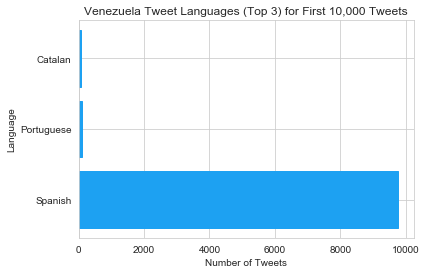

In [30]:
tweet_lang_types = []
tweet_lang_counts = []
sorted_tweet_languages_count = tweet_languages_count.most_common(3)

for lang, count in sorted_tweet_languages_count:
    tweet_lang_types.append(lang)
    tweet_lang_counts.append(count)

tweet_lang_types_long = []
for lang in tweet_lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        tweet_lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        tweet_lang_types_long.append('N/A')

# Labels
plt.title('Venezuela Tweet Languages (Top 3) for First 10,000 Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Language')

# Add Data
y_pos = np.arange(len(tweet_lang_types_long))
sns.set_style('whitegrid')
plt.barh(y_pos, tweet_lang_counts, color = twitter_color, edgecolor = twitter_color)
plt.yticks(y_pos, tweet_lang_types_long)

plt.show()

---
## Account Language Summary

In [7]:
accounts_filename_one = '../Data/venezuela_201901_1_users_csv_hashed.csv'
accounts_filename_two = '../Data/venezuela_201901_2_users_csv_hashed.csv'

# Import datasets
ven_accounts_one = pd.read_csv(accounts_filename_one, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})
ven_accounts_two = pd.read_csv(accounts_filename_two, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})

#### Combine datasets / Print number of users

In [8]:
ven_account_datasets = [ven_accounts_one, ven_accounts_two]
ven_users = pd.concat(ven_account_datasets, sort=False)
print(len(ven_users))

1951


#### Print available features

In [26]:
ven_users.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

#### Sample data of account languages

In [27]:
for elem in ven_users.head(5)['account_language']:
    print(elem)

es
es
es
es
es


#### Get counts of each language

In [28]:
languages_count = Counter(ven_users['account_language'])
print(languages_count)

Counter({'es': 1886, 'en': 64, 'pt': 1})


#### Plot language counts

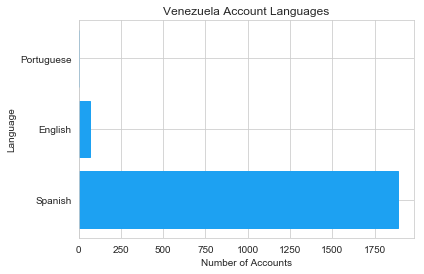

In [29]:
lang_types = []
lang_counts = []
sorted_languages_count = languages_count.most_common(10)

for lang, count in sorted_languages_count:
    lang_types.append(lang)
    lang_counts.append(count)

lang_types_long = []
for lang in lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        lang_types_long.append('N/A')

# Labels
plt.title('Venezuela Account Languages')
plt.xlabel('Number of Accounts')
plt.ylabel('Language')

# Add Data
y_pos = np.arange(len(lang_types_long))
sns.set_style('whitegrid')
plt.barh(y_pos, lang_counts, color = twitter_color, edgecolor = twitter_color)
plt.yticks(y_pos, lang_types_long)

plt.show()